# Lets start with importing the library!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

dataset=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQmDbYzIsdhTSGDJW-TNx3IBxob1JHqeTaeZkFSJjIq44oBUosLonZeDxkmAPIQirkGmN8f7S9R2q3x/pub?gid=2043797390&single=true&output=csv')

# Data Overview

In [ ]:
#Menampilkan 5 data teratas
dataset.head()

,employee_id,department,region,education,gender,job_level,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,satisfaction_score,engagement_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,senior,sourcing,1,35,5.0,8,0,49,5,0.88,0
1,65141,Operations,region_22,Bachelor's,m,middle,other,1,30,5.0,4,0,60,1,0.31,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,middle,sourcing,1,34,3.0,7,0,50,5,3.10,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,senior,other,2,39,1.0,10,0,50,4,0.64,0
4,48945,Technology,region_26,Bachelor's,m,senior,other,1,45,3.0,2,0,73,2,0.95,0


In [ ]:
#Check informasi dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   job_level             78298 non-null  object 
 6   recruitment_channel   78298 non-null  object 
 7   no_of_trainings       78298 non-null  int64  
 8   age                   78298 non-null  int64  
 9   previous_year_rating  72362 non-null  float64
 10  length_of_service     78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  satisfaction_score    78298 non-null  int64  
 14  engagement_score      78298 non-null  float64
 15  is_promoted        

In [ ]:
dataset.describe().T


,count,mean,std,min,25%,50%,75%,max
employee_id,78298.0,39149.500000,22602.830026,1.0,19575.25,39149.50,58723.75,78298.0
no_of_trainings,78298.0,1.253378,0.606766,1.0,1.00,1.00,1.00,10.0
age,78298.0,34.797619,7.665928,20.0,29.00,33.00,39.00,60.0
previous_year_rating,72362.0,3.332219,1.260982,1.0,3.00,3.00,4.00,5.0
length_of_service,78298.0,5.848974,4.248070,1.0,3.00,5.00,7.00,37.0
awards_won?,78298.0,0.023053,0.150073,0.0,0.00,0.00,0.00,1.0
avg_training_score,78298.0,63.349664,13.383664,39.0,51.00,60.00,76.00,99.0
satisfaction_score,78298.0,2.997088,1.417143,1.0,2.00,3.00,4.00,5.0
engagement_score,78298.0,1.497678,1.190530,0.0,0.54,1.17,2.23,5.0
is_promoted,78298.0,0.015658,0.124150,0.0,0.00,0.00,0.00,1.0


# Checking the Missing Value

In [ ]:
#Cek dataset yang berisikan Null
dataset.isnull().sum()

employee_id                0
department                 0
region                     0
education               3443
gender                     0
job_level                  0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    5936
length_of_service          0
awards_won?                0
avg_training_score         0
satisfaction_score         0
engagement_score           0
is_promoted                0
dtype: int64

As we can see, the education and previous_year_rating fields contain null. So, we have to clean this all

In [ ]:
#Proses cleansing data
#Pembuatan variabel 'cleaned_dataset' berisi dataset yang telah dibersihkan dengan mengisi data pada kolom yang berisi nilai null dan menghapus kolom yang tidak digunakan

cleaned_dataset=dataset.copy()
cleaned_dataset['education']=cleaned_dataset['education'].fillna('No Data')
cleaned_dataset['previous_year_rating']=cleaned_dataset['previous_year_rating'].fillna(cleaned_dataset['previous_year_rating'].median())
cleaned_dataset=cleaned_dataset.drop(['employee_id'], axis=1)
cleaned_dataset=cleaned_dataset.rename(columns={'is_promoted':'label'})
cleaned_dataset.isnull().sum()

department              0
region                  0
education               0
gender                  0
job_level               0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
satisfaction_score      0
engagement_score        0
label                   0
dtype: int64

In [ ]:
cleaned_dataset.head()

,department,region,education,gender,job_level,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,satisfaction_score,engagement_score,label
0,Sales & Marketing,region_7,Master's & above,f,senior,sourcing,1,35,5.0,8,0,49,5,0.88,0
1,Operations,region_22,Bachelor's,m,middle,other,1,30,5.0,4,0,60,1,0.31,0
2,Sales & Marketing,region_19,Bachelor's,m,middle,sourcing,1,34,3.0,7,0,50,5,3.10,0
3,Sales & Marketing,region_23,Bachelor's,m,senior,other,2,39,1.0,10,0,50,4,0.64,0
4,Technology,region_26,Bachelor's,m,senior,other,1,45,3.0,2,0,73,2,0.95,0


In [ ]:
#Checking the cleaned dataset information
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            78298 non-null  object 
 1   region                78298 non-null  object 
 2   education             78298 non-null  object 
 3   gender                78298 non-null  object 
 4   job_level             78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  78298 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  awards_won?           78298 non-null  int64  
 11  avg_training_score    78298 non-null  int64  
 12  satisfaction_score    78298 non-null  int64  
 13  engagement_score      78298 non-null  float64
 14  label                 78298 non-null  int64  
dtypes: float64(2), int6

In [ ]:
cleaned_dataset['label'].value_counts()

0    77072
1     1226
Name: label, dtype: int64

# Visualization Percentage is Promoted

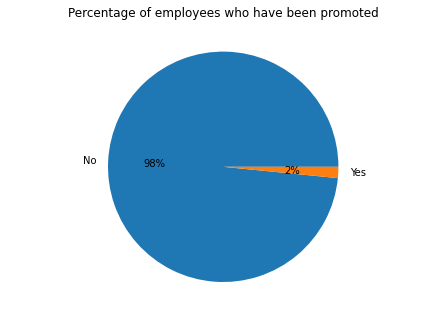

In [ ]:
#Visualizing Percentage is promoted
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No', 'Yes']
label = cleaned_dataset.label.value_counts()
ax.pie(label, labels=labels, autopct='%.0f%%')
plt.title('Percentage of employees who have been promoted')
plt.show()

# Exploratory Data Analysis

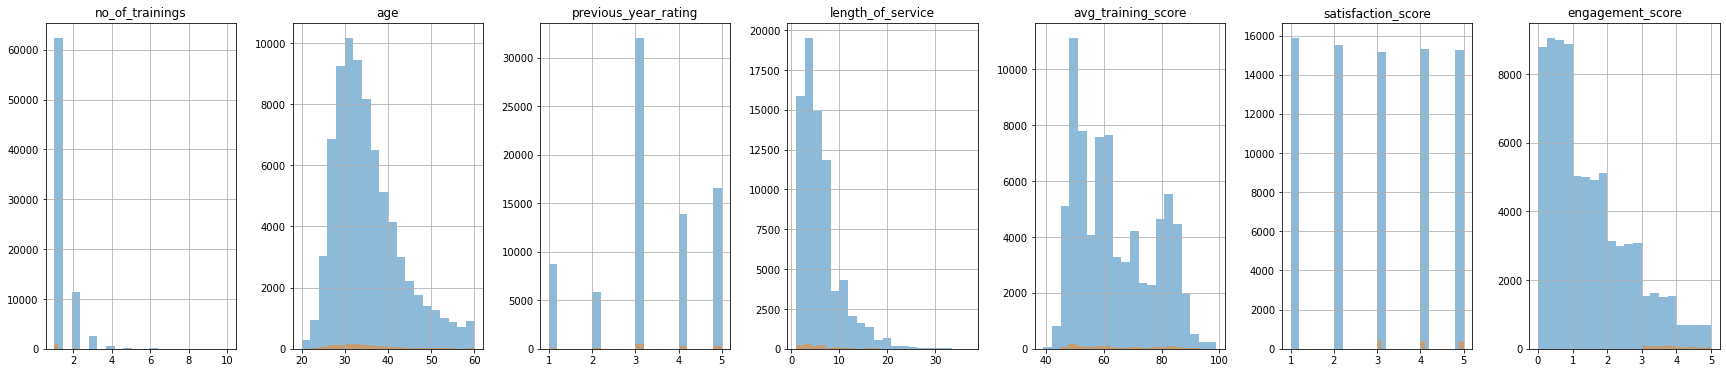

In [ ]:
#Exploratory Data Analysis (EDA) Numerical Variables
numerical_features = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score', 'satisfaction_score', 'engagement_score']
fig, ax = plt.subplots(1, 7, figsize=(30, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and red, respectively
cleaned_dataset[cleaned_dataset.label == 0][numerical_features].hist(bins=20, alpha=0.5, ax=ax)
cleaned_dataset[cleaned_dataset.label == 1][numerical_features].hist(bins=20, alpha=0.5, ax=ax)
plt.show()

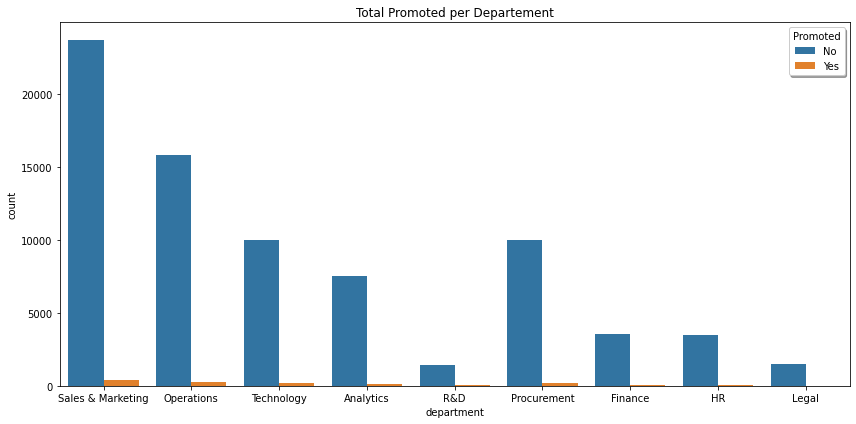

In [ ]:
#Exploratory Data Analysis (EDA) Categorical Variables
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.countplot(data=cleaned_dataset,x='department',hue='label')
plt.title('Total Promoted per Departement')
legend=plt.legend(bbox_to_anchor=(1,1), shadow=True, title='Promoted')
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.show()

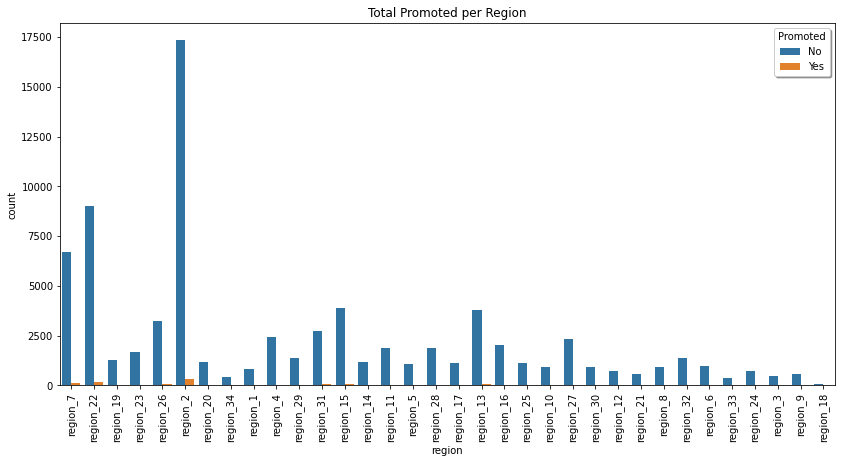

In [ ]:
#Exploratory Data Analysis (EDA) Categorical Variables
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.countplot(data=cleaned_dataset,x='region',hue='label')
plt.title('Total Promoted per Region')
legend=plt.legend(bbox_to_anchor=(1,1), shadow=True, title='Promoted')
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

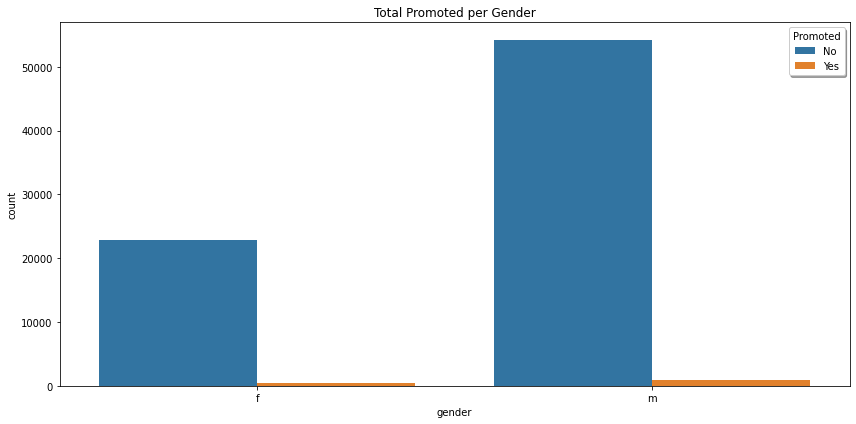

In [ ]:
#Exploratory Data Analysis (EDA) Categorical Variables
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.countplot(data=cleaned_dataset,x='gender',hue='label')
plt.title('Total Promoted per Gender')
legend=plt.legend(bbox_to_anchor=(1,1), shadow=True, title='Promoted')
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.show()

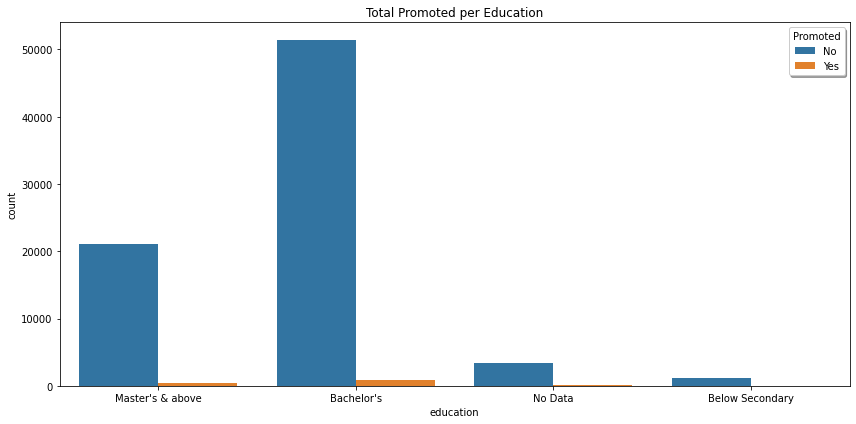

In [ ]:
#Exploratory Data Analysis (EDA) Categorical Variables
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.countplot(data=cleaned_dataset,x='education',hue='label')
plt.title('Total Promoted per Education')
legend=plt.legend(bbox_to_anchor=(1,1), shadow=True, title='Promoted')
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.show()

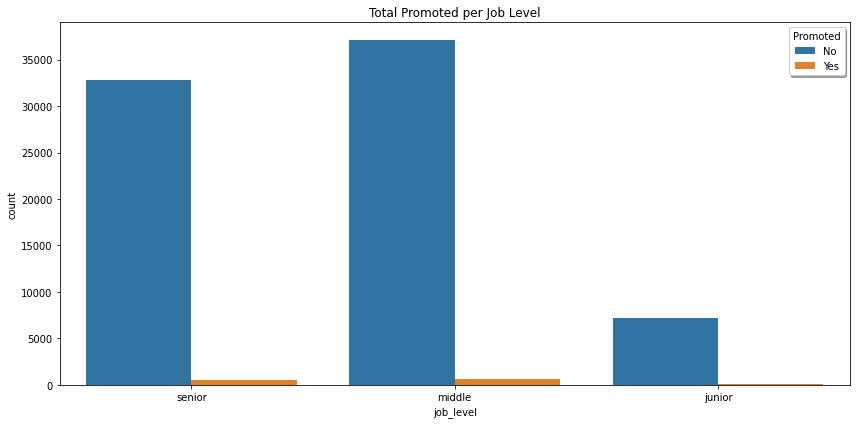

In [ ]:
#Exploratory Data Analysis (EDA) Categorical Variables
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.countplot(data=cleaned_dataset,x='job_level',hue='label')
plt.title('Total Promoted per Job Level')
legend=plt.legend(bbox_to_anchor=(1,1), shadow=True, title='Promoted')
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.show()

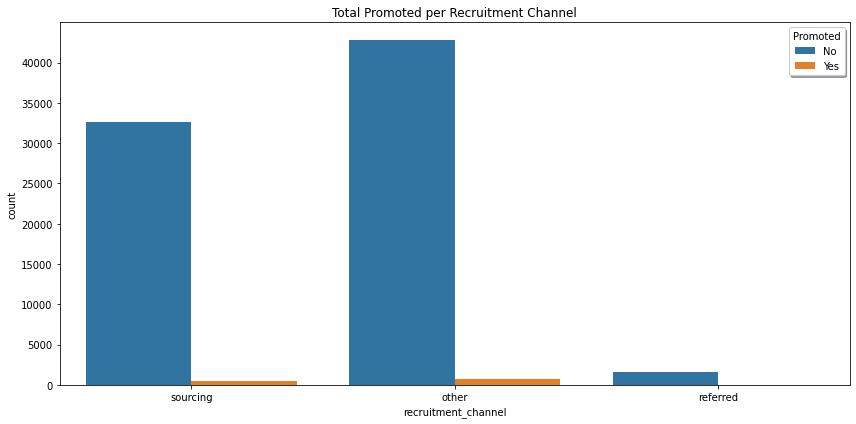

In [ ]:
#Exploratory Data Analysis (EDA) Categorical Variables
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.countplot(data=cleaned_dataset,x='recruitment_channel',hue='label')
plt.title('Total Promoted per Recruitment Channel')
legend=plt.legend(bbox_to_anchor=(1,1), shadow=True, title='Promoted')
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.show()

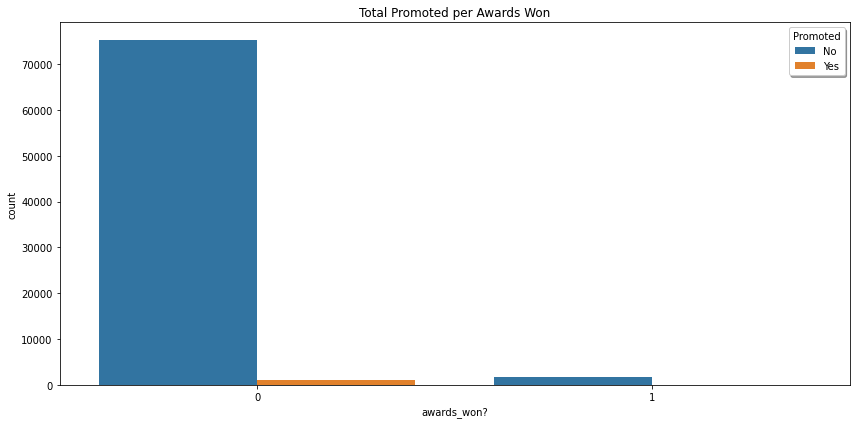

In [ ]:
#Exploratory Data Analysis (EDA) Categorical Variables
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.countplot(data=cleaned_dataset,x='awards_won?',hue='label')
plt.title('Total Promoted per Awards Won')
legend=plt.legend(bbox_to_anchor=(1,1), shadow=True, title='Promoted')
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.show()

# Building Machine Learning

In [ ]:
#Data preparation by encoding data and sharing train and test data for model building
for column in cleaned_dataset.columns:
    if cleaned_dataset[column].dtype == np.number: continue
    cleaned_dataset[column] = LabelEncoder().fit_transform(cleaned_dataset[column])
    
# Predictor dan target
X = cleaned_dataset.drop('label', axis=1)
y = cleaned_dataset['label']

# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#SMOTE Oversampling Data Training
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train, y_train=smote.fit_resample(x_train, y_train)

# Print according to the expected result
print('The number of rows and columns of x_train is:', x_train.shape, ', while the Number of rows and columns of y_train is:', y_train.shape)
print('The percentage of Promoted in the Training data is:')
print(y_train.value_counts(normalize=True))
print('The number of rows and columns of x_test is:', x_test.shape, ', while the Number of rows and columns of y_test is:', y_test.shape)
print('The percentage of Promoted in the Testing data is:')
print(y_test.value_counts(normalize=True))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


The number of rows and columns of x_train is: (107892, 14) , while the Number of rows and columns of y_train is: (107892,)
The percentage of Promoted in the Training data is:
0    0.5
1    0.5
Name: label, dtype: float64
The number of rows and columns of x_test is: (23490, 14) , while the Number of rows and columns of y_test is: (23490,)
The percentage of Promoted in the Testing data is:
0    0.984504
1    0.015496
Name: label, dtype: float64


In [ ]:
X = cleaned_dataset.drop('label', axis=1)
X

,department,region,education,gender,job_level,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,satisfaction_score,engagement_score
0,7,31,2,0,2,2,0,15,5.0,7,0,10,4,0.88
1,4,14,0,1,1,0,0,10,5.0,3,0,21,0,0.31
2,7,10,0,1,1,2,0,14,3.0,6,0,11,4,3.10
3,7,15,0,1,2,0,1,19,1.0,9,0,11,3,0.64
4,8,18,0,1,2,0,0,25,3.0,1,0,34,1,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78293,3,11,1,1,0,2,0,4,3.0,0,0,22,3,0.61
78294,8,17,0,1,1,2,0,11,3.0,6,0,35,1,1.47
78295,2,7,0,0,0,2,0,6,4.0,3,0,11,0,2.62
78296,5,24,0,1,1,2,2,7,3.0,0,0,31,2,1.98


In [ ]:
y = cleaned_dataset['label']
y

0        0
1        0
2        0
3        0
4        0
        ..
78293    0
78294    0
78295    0
78296    0
78297    0
Name: label, Length: 78298, dtype: int64

# Modelling using Logistic Regression Algorithm

In [ ]:
# Modelling using Logistic Regression Algorithm
log_model=LogisticRegression().fit(x_train, y_train)
print('The Logistic Regression model formed is: \n', log_model)

The Logistic Regression model formed is: 
 LogisticRegression()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Model performance testing using Logistic Regression Algorithm based on training data
y_train_pred = log_model.predict(x_train)
# Print classification report
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))
print(accuracy_score(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     53946
           1       0.90      0.98      0.94     53946

    accuracy                           0.94    107892
   macro avg       0.94      0.94      0.94    107892
weighted avg       0.94      0.94      0.94    107892

0.9352037222407593


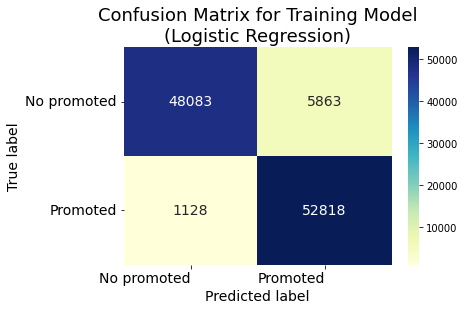

In [ ]:
# Testing model performance using Logistic Regression Algorithm based on training data - Displaying Plots of heatmap confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No promoted', 'Promoted'), ('No promoted', 'Promoted'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
# Model performance testing using Logistic Regression Algorithm based on data testing
y_test_pred = log_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Logistic Regression) :')
print(classification_report(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     23126
           1       0.12      0.94      0.21       364

    accuracy                           0.89     23490
   macro avg       0.56      0.91      0.58     23490
weighted avg       0.99      0.89      0.93     23490

0.8917411664538102


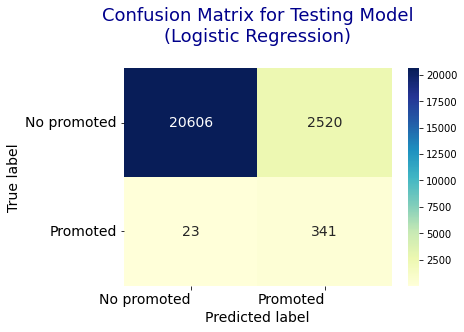

In [ ]:
# Model performance testing using Logistic Regression Algorithm based on data testing - Displaying Plots of heatmap confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No promoted', 'Promoted'), ('No promoted', 'Promoted'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

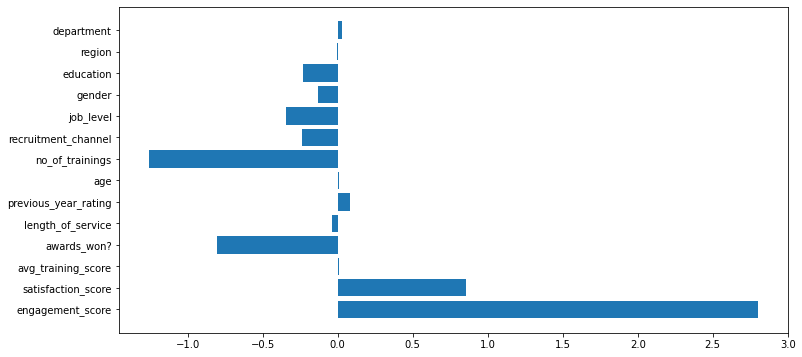

In [ ]:
importance = log_model.coef_[0]
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(X.columns, importance, align='center')
ax.invert_yaxis()
plt.show()

# Modeling using the Random Forest Classifier Algorithm

In [ ]:
# Modeling using the Random Forest Classifier Algorithm
rdf_model=RandomForestClassifier().fit(x_train, y_train)
print('The Random Forest Classifier model formed is: \n', rdf_model)

The Random Forest Classifier model formed is: 
 RandomForestClassifier()


In [ ]:
# Testing the performance of the model using the Random Forest Classifier Algorithm based on training data
y_train_pred = rdf_model.predict(x_train)
print('Classification Report Training Model (Random Forest Classifier) :')
print(classification_report(y_train, y_train_pred))
print(accuracy_score(y_train, y_train_pred))

Classification Report Training Model (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53946
           1       1.00      1.00      1.00     53946

    accuracy                           1.00    107892
   macro avg       1.00      1.00      1.00    107892
weighted avg       1.00      1.00      1.00    107892

1.0


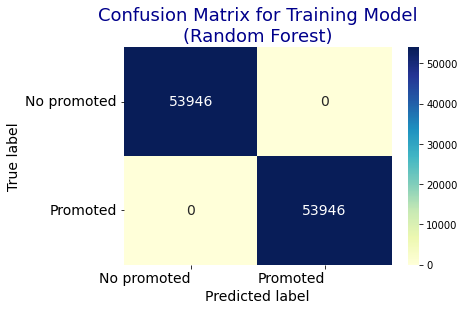

In [ ]:
# Testing the performance of the model using the Random Forest Classifier Algorithm based on training data - Displaying Plots of heatmap confusion matrix

confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No promoted', 'Promoted'), ('No promoted', 'Promoted'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
# Testing the performance of the model using the Random Forest Classifier Algorithm based on data testing
y_test_pred = rdf_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     23126
           1       0.22      0.30      0.25       364

    accuracy                           0.97     23490
   macro avg       0.60      0.64      0.62     23490
weighted avg       0.98      0.97      0.97     23490

0.9728395061728395


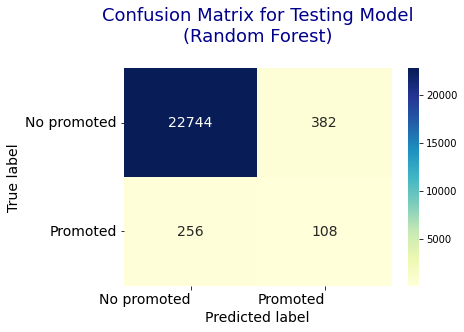

In [ ]:
# Testing the performance of the model using the Random Forest Classifier Algorithm based on data testing - Displaying Plots of heatmap confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No promoted', 'Promoted'), ('No promoted', 'Promoted'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

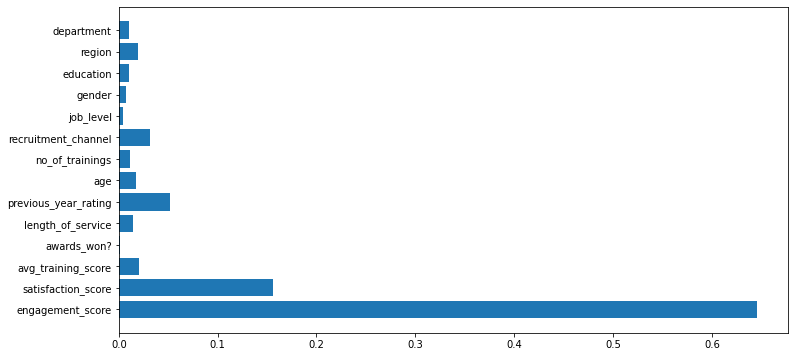

In [ ]:
importance = rdf_model.feature_importances_
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(X.columns, importance, align='center')
ax.invert_yaxis() 
plt.show()

# Modeling using the Gradient Boosting Classifier Algorithm

In [ ]:
# Modeling using the Gradient Boosting Classifier Algorithm
gbt_model=GradientBoostingClassifier().fit(x_train, y_train)
print('The Random Forest Classifier model formed is: \n', gbt_model)

The Random Forest Classifier model formed is: 
 GradientBoostingClassifier()


In [ ]:
# Testing the performance of the model using the Gradient Boosting Classifier Algorithm based on training data
y_train_pred = gbt_model.predict(x_train)
# Print classification report 
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_train, y_train_pred))
print(accuracy_score(y_train, y_train_pred))

Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     53946
           1       0.95      1.00      0.97     53946

    accuracy                           0.97    107892
   macro avg       0.97      0.97      0.97    107892
weighted avg       0.97      0.97      0.97    107892

0.9723427130834538


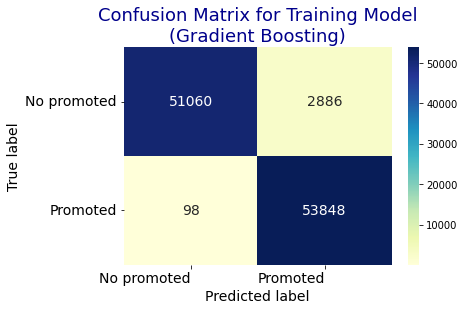

In [ ]:
# Testing the performance of the model using the Gradient Boosting Classifier Algorithm based on training data - Displaying Plots of heatmap confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No promoted', 'Promoted'), ('No promoted', 'Promoted'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
# Testing the performance of the model using the Gradient Boosting Classifier Algorithm based on data testing
y_test_pred = gbt_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     23126
           1       0.20      0.88      0.33       364

    accuracy                           0.94     23490
   macro avg       0.60      0.91      0.65     23490
weighted avg       0.99      0.94      0.96     23490

0.9443593018305662


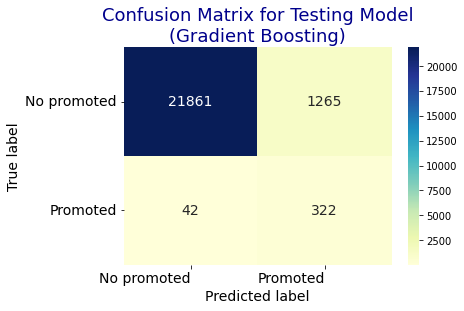

In [ ]:
# Testing the performance of the model using the Gradient Boosting Classifier Algorithm based on data testing - Displaying Plots of heatmap confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No promoted', 'Promoted'), ('No promoted', 'Promoted'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

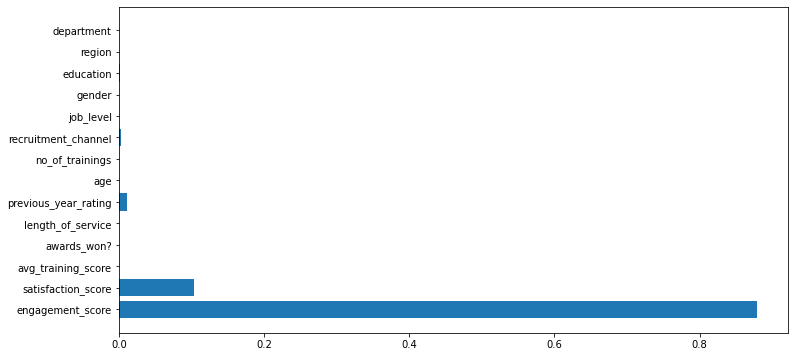

In [ ]:
importance = gbt_model.feature_importances_
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(X.columns, importance, align='center')
ax.invert_yaxis()  
plt.show()

# Conclusion


1. Kemampuan akurasi dari semua model tidak berbeda cukup 
jauh, tetapi yang memberikan kemampuan akurasi yang lebih 
baik adalah Algoritma Gradient Boosting Classifier. Jadi dalam 
menentukan prediktor/fitur menggunakan hasil model dari 
Algoritma Gradient Boosting Classifier.
2. Prediktor/Fitur yang menentukan apakah karyawan diberikan 
promosi atau tidak adalah 'engagement_score', 
‘satisfaction_score', dan 'previous_year_rating'. Seperti yang 
dijelaskan dalam analisis data eksplorasi, ini tepat, karena data 
visualisasi menunjukkan bahwa ketiga prediktor memiliki 
kecenderungan dalam menentukan promosi karyawan.